In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("mail_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


"Ham" is e-mail that is not Spam

In [15]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

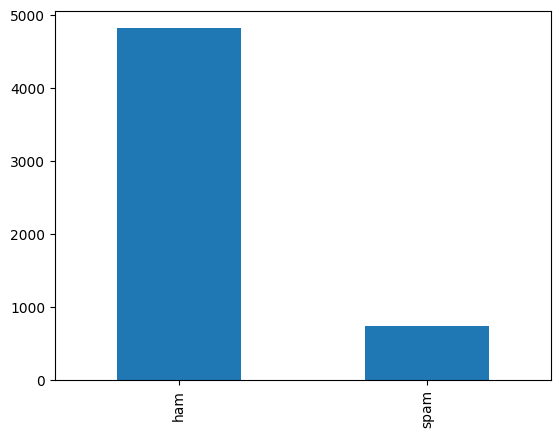

In [23]:
df.Category.value_counts().plot.bar();


In [24]:
df.drop_duplicates(inplace=True)
df.shape

(5157, 3)

In [25]:
df['spam']=df['Category'].apply(lambda x : 1 if x=='spam' else 0 )
df.head(3)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
count=v.fit_transform(df['Message'])
count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(count,df.spam,test_size=0.2)


In [28]:
X_train.shape


(4125, 8709)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [30]:
model.fit(X_train,Y_train)

MultinomialNB()

In [31]:
model.score(X_test,Y_test) #naive bayes algorithm

0.9777131782945736